<a href="https://colab.research.google.com/github/aparnaashok2125/Elevvo-Pathways-NLP-Internship/blob/main/Elevvo_Pathways_Task_1_Sentiment_Analysis_on_Product_Reviews_(IMDb_Reviews).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1.Importing necessary libraries**

In [ ]:
# Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk  # For natural language processing (NLP)
from sklearn.feature_extraction.text import CountVectorizer  # Converts text into numerical representation using Bag of Words
from sklearn.feature_extraction.text import TfidfVectorizer  # Computes TF-IDF from text
from sklearn.preprocessing import LabelBinarizer  # For binarizing labels
from nltk.corpus import stopwords  # List of common words usually ignored in text analysis
from nltk.stem.porter import PorterStemmer  # For stemming using the Porter algorithm
from wordcloud import WordCloud, STOPWORDS  # To create word cloud visualizations from text
from nltk.stem import WordNetLemmatizer  # For lemmatization using WordNet
from nltk.tokenize import word_tokenize, sent_tokenize  # For word and sentence tokenization
from bs4 import BeautifulSoup  # For HTML and XML parsing (web scraping)
import spacy  # Fast and efficient NLP library
import re, string, unicodedata  # For string manipulation and text normalization
from nltk.tokenize.toktok import ToktokTokenizer  # More efficient tokenizer
from nltk.stem import LancasterStemmer, WordNetLemmatizer  # Alternatives for stemming and lemmatization
from sklearn.linear_model import LogisticRegression, SGDClassifier  # Logistic regression and SGD classifiers for classification
from sklearn.naive_bayes import MultinomialNB  # Classification using Naive Bayes
from sklearn.svm import SVC  # Support Vector Classifier
from textblob import TextBlob  # For text and sentiment analysis
from textblob import Word  # For word processing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # For model evaluation
import time  # For measuring code execution time

import warnings
warnings.filterwarnings('ignore')  # Ignore warnings

# Setting up the visualization style
sns.set(style='whitegrid')


**explanation**

1. **numpy**: Used for efficient array manipulation and mathematical operations, commonly applied in data processing and numerical analysis.

2. **pandas**: Used for data manipulation and analysis, providing powerful data structures like DataFrame to manage tabular data.

3. **seaborn**: A data visualization library built on top of Matplotlib, used to create informative and attractive statistical plots.

4. **matplotlib.pyplot**: A library for creating 2D data visualizations with various types of graphs and plots.

5. **nltk (Natural Language Toolkit)**: A library for natural language processing (NLP), providing tools for tokenization, stemming, and other text processing tasks.

6. **sklearn.feature_extraction.text.CountVectorizer**: Converts a collection of text into a feature matrix based on word counts (bag-of-words).

7. **sklearn.feature_extraction.text.TfidfVectorizer**: Converts a collection of text into a feature matrix based on Term Frequency-Inverse Document Frequency (TF-IDF), which accounts for word importance in a document relative to the entire corpus.

8. **sklearn.preprocessing.LabelBinarizer**: Converts categorical labels into a binary format (one-hot encoding) for use in machine learning models.

9. **nltk.corpus.stopwords**: Provides a list of common words (stopwords) in various languages that are often ignored in text analysis.

10. **nltk.stem.porter.PorterStemmer**: Used to reduce words to their base form (stemming) using the Porter algorithm.

11. **wordcloud**: A library for creating word cloud visualizations, showing the frequency of words in text.

12. **nltk.stem.WordNetLemmatizer**: Used for lemmatization, which reduces words to their base form while considering the context.

13. **nltk.tokenize.word_tokenize, nltk.tokenize.sent_tokenize**: Used to break text into words or sentences (tokenization).

14. **bs4 (BeautifulSoup)**: Used for parsing and extracting data from HTML and XML, highly useful for web scraping.

15. **spacy**: A fast and efficient NLP library, used for text analysis with features such as tokenization, entity recognition, and syntactic dependency parsing.

16. **re, string, unicodedata**: Libraries for string processing and regular expressions, used to clean and format text.

17. **nltk.tokenize.toktok.ToktokTokenizer**: A fast and efficient tokenizer for breaking text into tokens.

18. **nltk.stem.LancasterStemmer**: Stemming using the Lancaster algorithm, which is more aggressive compared to the Porter algorithm.

19. **sklearn.linear_model.LogisticRegression, SGDClassifier**: Classification models used to predict categories based on input features.

20. **sklearn.naive_bayes.MultinomialNB**: Naive Bayes classification model suitable for discrete data, especially text.

21. **sklearn.svm.SVC**: Support Vector Classification (SVC) model used for classification based on a hyperplane in feature space.

22. **textblob**: A library for natural language processing that provides a simple API for text analysis, including sentiment analysis.

23. **sklearn.metrics.classification_report, confusion_matrix, accuracy_score**: Used to evaluate model classification performance, providing metric reports like precision, recall, and F1-score.

24. **warnings**: A library for managing and displaying warnings in code, often used to suppress irrelevant warnings.


## **2. Load Data**

In [ ]:
#importing the training data
import csv # Import the csv module
# imdb_data = pd.read_csv('/content/IMDB_Dataset.csv') # Original line
try:
    # Try reading with the default engine first
    imdb_data = pd.read_csv('/content/IMDB_Dataset.csv')
except pd.errors.ParserError:
    # If ParserError occurs, try reading with a different engine and quoting
    print("ParserError occurred. Trying with a different engine and quoting.")
    try:
        imdb_data = pd.read_csv('/content/IMDB_Dataset.csv', engine='python', encoding='utf-8', quotechar='"', quoting=csv.QUOTE_MINIMAL, on_bad_lines='skip')
    except Exception as e:
        print(f"An error occurred while trying to read with skipping bad lines: {e}")
        # As a last resort, try reading with a different delimiter or other options if known
        # For this case, since the error is EOF inside string, skipping bad lines is the most relevant approach.
        # If this still fails, manual inspection or a different tool might be needed.


print(imdb_data.shape)
imdb_data.head(10)

ParserError occurred. Trying with a different engine and quoting.
(2417, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

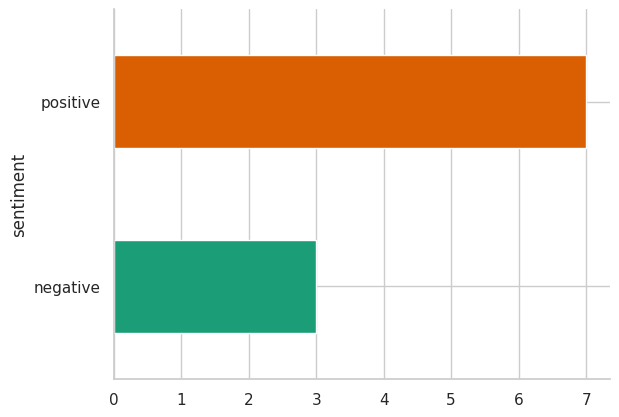

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2417 entries, 0 to 2416
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     2417 non-null   object
 1   sentiment  2417 non-null   object
dtypes: object(2)
memory usage: 37.9+ KB


## **3. Exploratory Data Analysis (EDA) & Pre-Processing**

### **3.1. Null & Duplicate Values checked**

In [ ]:
# Check for null values in the dataset
null_values = imdb_data.isnull().sum()
print("\nNull values in each column:\n", null_values)

# Check for duplicate rows in the dataset
duplicate_rows = imdb_data.duplicated().sum()
print("\nNumber of duplicate rows:", duplicate_rows)



Null values in each column:
 review       0
sentiment    0
dtype: int64

Number of duplicate rows: 0



**Explanation**  
The current version is the result of several iterations. Not removing duplicates can improve model performance, likely because repeated data can provide additional useful information for the model to understand existing patterns. Additionally, duplicates may reflect variations in relevant contexts, helping the model become more robust. You can try this approach independently and iterate multiple times to observe the results.


### **3.2. Features Engineering**

#### **3.2.1. review_length**

In [ ]:
# Calculate the length of the reviews and store it in a new column
imdb_data['review_length'] = imdb_data['review'].apply(lambda x: len(x.split()))

imdb_data.head(5)

,review,sentiment,review_length
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


#### **3.2.2. review_length Binned**

In [ ]:
# View unique values in the 'review_length' column
unique_lengths = imdb_data['review_length'].unique()
print("Unique Review Lengths:")
print(unique_lengths)

Unique Review Lengths:
[ 307  162  166  138  230  119  150  174  130   33   96  180  398  117
   50  140  146  228  129  133  308   65  332  151  114  570  145  122
  615  400  354  105  652  253  369   95  310  259  123  212  176  262
  178  235   76  143  707   99  419  621   80  194  211  210  165  488
  445  171  153   86   47  293  336  199  300  221  284  245  190  271
  309  608  137  160  149  257  426   75  147  297  193  352  173  263
  186  189  525  766  299  214  111  169  196   40  266  125  341   87
  281  115  168  205  141  134  208  197  434  188  421  103  286  393
  287  569   83  251  316  220  139  282  163  181  177  200   93  845
   53   74  487  374  231  116  356  248  154  373  274  283  219  761
  207  127  545  530   97  203  524  326  762  107   55  198  503  100
  320   64  152   62  564   82  340  249  109  437  108  247  306  291
  296  185  641  148   73   69  267  170   46  201  135  161  215  343
  350  423  376  484  217  460  918  120  560  155  32

In [ ]:
# Defining binning boundaries
bins = [0, 100, 500, 1000, 1500, float('inf')]
labels = ['Short', 'Medium', 'Long', 'Very Long', 'Extreme']

# Creating a new column based on binning
imdb_data['review_length_binned'] = pd.cut(imdb_data['review_length'], bins=bins, labels=labels, right=True)

# Displaying top data to view the new column
print(imdb_data[['review_length', 'review_length_binned']].head(5))


   review_length review_length_binned
0            307               Medium
1            162               Medium
2            166               Medium
3            138               Medium
4            230               Medium


### **3.3. Check Class Distribution**


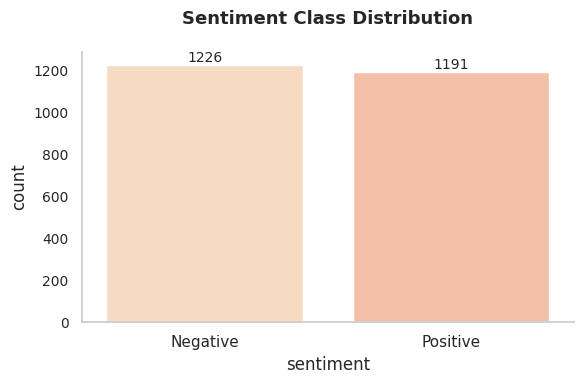

In [ ]:
# Create count plot
plt.figure(figsize=(6, 4))  # Set figure size
ax = sns.countplot(x='sentiment', data=imdb_data, palette=['#FFDAB9', '#FFBC9A'])  # Peach tones

# Add title
plt.title('Sentiment Class Distribution', fontsize=13, weight='bold', ha='center', pad=20)

# Add counts above the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

# Remove gridlines and figure border
plt.grid(False)
sns.despine()

# Set x-axis labels
ax.set_xticklabels(['Negative', 'Positive'], ha='center')

# Adjust y-axis settings
ax.tick_params(axis='y', labelsize=10)

# Display plot
plt.tight_layout()
plt.show()


**Explanation**

The positive and negative classes are balanced.



### **3.4. Check Review Length Distribution**


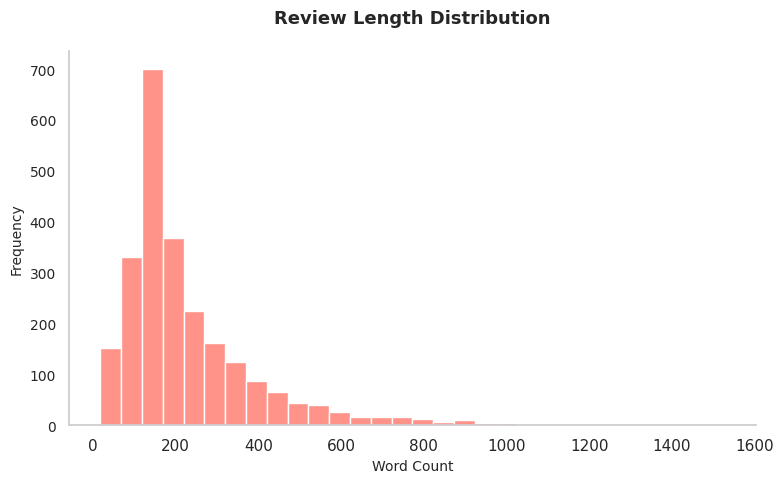

In [ ]:
# Set style
sns.set(style='whitegrid')

# Add review length column
imdb_data['review_length'] = imdb_data['review'].apply(lambda x: len(x.split()))

# Create review length distribution plot
plt.figure(figsize=(8, 5))
ax = sns.histplot(imdb_data['review_length'], bins=30, color='#FF6F61')  # Coral color

# Add title with padding
plt.title('Review Length Distribution', fontsize=13, weight='bold', ha='center', pad=20)

# Remove gridlines and figure border
plt.grid(False)
sns.despine()

# Add axis labels
plt.xlabel('Word Count', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

# Adjust tick label size
ax.tick_params(axis='y', labelsize=10)

# Display plot
plt.tight_layout()
plt.show()


### **3.4. Correlation between Review Length and Sentiment**


In [ ]:
# Create a contingency DataFrame to count the frequency of review length categories and sentiment
contingency_table = pd.crosstab(imdb_data['review_length_binned'], imdb_data['sentiment'])

# Calculate percentages
contingency_table_percentage = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

# Display the percentage table
print(contingency_table_percentage)


sentiment              negative    positive
review_length_binned                       
Short                 42.038217   57.961783
Medium                50.441100   49.558900
Long                  50.289017   49.710983
Very Long              0.000000  100.000000
Extreme                0.000000  100.000000


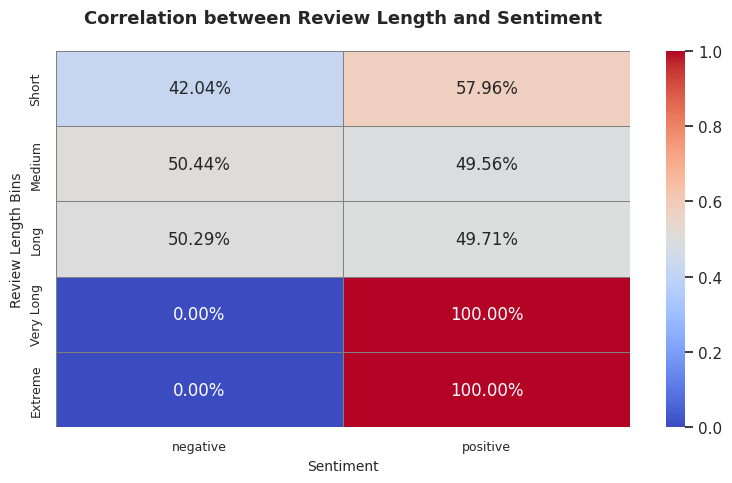

In [ ]:
# Create a contingency DataFrame to count the frequency of review length categories and sentiment
contingency_table = pd.crosstab(imdb_data['review_length_binned'], imdb_data['sentiment'])

# Calculate percentages
contingency_table_percentage = contingency_table.div(contingency_table.sum(axis=1), axis=0)

# Create a heatmap plot
plt.figure(figsize=(8, 5))  # Set the figure size
ax = sns.heatmap(contingency_table_percentage, annot=True, fmt=".2%", cmap='coolwarm', cbar=True, linewidths=0.5, linecolor='gray')

# Add a title
plt.title('Correlation between Review Length and Sentiment', fontsize=13, weight='bold', ha='center', pad=20)

# Set axis labels
ax.set_xlabel('Sentiment', fontsize=10)
ax.set_ylabel('Review Length Bins', fontsize=10)

# Improve tick appearance
ax.tick_params(axis='both', labelsize=9)

# Display the plot
plt.tight_layout()
plt.show()



**Explanation**
- **Positive Sentiment Dominates:** In general, the longer the review, the greater the likelihood of providing a positive rating, especially for extreme reviews.
- **Short Reviews Are Less Favorable:** Although short reviews tend to be positive, their proportion is not as high as that of long and extreme reviews. This may indicate that short reviews might be less informative.
- **Relevance of Review Length:** The length of the review appears to be positively correlated with the sentiment given. Users may feel more capable of expressing their positive opinions in longer reviews.

**Theory**

To examine whether there is a significant relationship between `sentiment` and `review_length`, we can perform a statistical test. Since `sentiment` is a categorical variable (0 and 1), and `review_length` is a numerical variable, we can use a *t-test* for two independent samples. The following are the steps we will take:

**Hypotheses**
- **H0 (Null Hypothesis)**: There is no difference in the average review length between positive and negative sentiments (mean length of reviews with positive sentiment = mean length of reviews with negative sentiment).
- **H1 (Alternative Hypothesis)**: There is a difference in the average review length between positive and negative sentiments (mean length of reviews with positive sentiment ≠ mean length of reviews with negative sentiment).

In [ ]:
from scipy import stats

# Separating review lengths based on sentiment
length_positive = imdb_data[imdb_data['sentiment'] == 1]['review_length']
length_negative = imdb_data[imdb_data['sentiment'] == 0]['review_length']

# Calculating the average review length for each category
mean_positive = length_positive.mean()
mean_negative = length_negative.mean()

# Performing t-test
t_stat, p_value = stats.ttest_ind(length_positive, length_negative)

# Displaying results
print("Average review length (Positive):", mean_positive)
print("Average review length (Negative):", mean_negative)
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Determining significance
alpha = 0.05
if p_value < alpha:
    print("Reject H0: There is a significant difference between the lengths of positive and negative reviews.")
else:
    print("Fail to reject H0: There is no significant difference between the lengths of positive and negative reviews.")


Average review length (Positive): nan
Average review length (Negative): nan
T-statistic: nan
P-value: nan
Fail to reject H0: There is no significant difference between the lengths of positive and negative reviews.


After conducting the statistical test, we can calculate the effect size to measure the magnitude of the impact of the average difference. One way to calculate the effect size is by using Cohen's d.

**Interpretation of Cohen's d:**
- **Small** (d = 0.2): Small effect
- **Medium** (d = 0.5): Medium effect
- **Large** (d = 0.8): Large effect

By calculating this effect size, we can gain a clearer understanding of how strong the relationship is between review length and sentiment. This is important because the statistical test results may indicate a significant difference, but the effect size will help us understand whether that difference is practically meaningful, not just statistically significant.

In [ ]:
def cohen_d(x, y):
    # Calculate Cohen's d
    nx = len(x)
    ny = len(y)
    mean_diff = x.mean() - y.mean()
    pooled_std = (((nx - 1) * x.std() ** 2 + (ny - 1) * y.std() ** 2) / (nx + ny - 2)) ** 0.5
    return mean_diff / pooled_std

# Calculate Cohen's d
effect_size = cohen_d(length_positive, length_negative)
print("Cohen's d:", effect_size)  # Display Cohen's d value


Cohen's d: nan


**Explanation**

- **Statistical Significance**: There is a significant difference in review length between positive and negative sentiments. In other words, review length can be considered as one of the factors related to sentiment.

- **Effect Size**: However, since Cohen's d is very small, this indicates that the detected mean difference may not be large enough to have a meaningful impact in practical terms. In model development, there may be other features that are stronger predictors of sentiment. For example, positive and negative words may have a greater influence, which will be elaborated after modeling.

###**3.5. Text normalization**

In [ ]:
import nltk
nltk.download('stopwords')

#Tokenization of text
tokenizer = ToktokTokenizer()

#Setting English stopwords
stopword_list = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Explanation**

1. **Importing NLTK and Downloading Stopwords:** This code imports the Natural Language Toolkit (NLTK) library used for natural language processing tasks. It then downloads the list of stopwords in English, which are common words (such as "and," "that," "is") that are typically removed from text during processing because they do not carry significant meaning.

2. **Text Tokenization:** A tokenizer named `ToktokTokenizer` is created. Tokenization is the process of breaking down text into smaller units, such as words or phrases, which makes analysis easier.

3. **Defining English Stopwords:** This code sets up the list of stopwords in English using the NLTK library so that the model can ignore these common words during text analysis.

### **3.6. Removing html strips and noise text**

In [ ]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(denoise_text)

**Explanation**:
1. **Removing HTML Strips:** The function `strip_html(text)` uses BeautifulSoup to parse the HTML content from the given text and extracts only the text without the HTML tags. This is useful for cleaning reviews that may contain HTML formatting.

2. **Removing Text Within Square Brackets:** The function `remove_between_square_brackets(text)` utilizes a regular expression to find and remove any text that appears within square brackets (e.g., "[[^]]*\]") from the input text. This helps eliminate irrelevant or noisy information.

3. **Removing Noisy Text:** The function `denoise_text(text)` combines the two previous functions. First, it removes HTML tags from the text, and then it eliminates text that is enclosed in square brackets. The result is cleaner and more readable text.

### **3.7.Removing special characters**

In [ ]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(remove_special_characters)

**Explanation**:
1. **Defining a Function to Remove Special Characters:** The function `remove_special_characters(text, remove_digits=True)` is designed to remove special characters from the input text. This function uses a regular expression pattern (`r'[^a-zA-Z0-9\s]'`) that matches everything that is not a letter (both uppercase and lowercase), a number, or a space.

2. **Removing Special Characters:** The method `re.sub(pattern, '', text)` is then used to replace all matches of the pattern in the text with an empty string, effectively removing those characters.

3. **Applying the Function to the Review Column:** Finally, the function `remove_special_characters` is applied to the 'review' column of the `imdb_data` DataFrame. This processes each review, cleaning it of special characters, resulting in a more uniform and readable dataset.

### **3.8. Text stemming**

In [ ]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text

#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(simple_stemmer)

**Explanation**:
1. **Defining a Stemming Function:** The function `simple_stemmer(text)` is created to perform stemming on the input text. Stemming is the process of reducing words to their base or root form. In this case, the function uses the **Porter Stemmer** from the NLTK library.

2. **Performing Stemming on Words:** Inside the function, the text is split into individual words, and each word is processed using the `stem()` method of the Porter Stemmer. The stemmed words are then concatenated back into a single string.

3. **Applying the Function to the Review Column:** Finally, the `simple_stemmer` function is applied to the 'review' column of the `imdb_data` DataFrame. This processes each review, reducing the words to their base forms, which helps in standardizing the text for further analysis.

### **3.9. Removing stopwords**

In [ ]:
#set stopwords to english
# stop=set(stopwords.words('english'))
# print(stop)

#removing the stopwords
# def remove_stopwords(text, is_lower_case=False):
   # tokens = tokenizer.tokenize(text)
   # tokens = [token.strip() for token in tokens]
   # if is_lower_case:
      #  filtered_tokens = [token for token in tokens if token not in stopword_list]
    # else:
      #  filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    # filtered_text = ' '.join(filtered_tokens)
    # return filtered_text

#Apply function on review column
# imdb_data['review']=imdb_data['review'].apply(remove_stopwords)

**Explanation**:
1. **Setting Up English Stopwords:** The code begins by importing a set of English stopwords from the NLTK library using `stopwords.words('english')`. Stopwords are common words (such as "and," "the," "is") that are usually removed from text data during preprocessing because they do not contribute much to sentiment analysis.

2. **Defining a Function to Remove Stopwords:** The function `remove_stopwords(text, is_lower_case=False)` is defined to remove stopwords from the input text. This function uses **ToktokTokenizer** to split the text into individual words.

3. **Filtering Tokens:** Within the function, tokens are trimmed of unnecessary spaces. Based on the `is_lower_case` parameter, the function checks whether to convert tokens to lowercase before filtering out stopwords. This ensures that comparisons are made without regard to case sensitivity. The remaining tokens (i.e., those that are not stopwords) are then concatenated back into a single string.

4. **Applying the Function to the Review Column:** Finally, the `remove_stopwords` function is applied to the 'review' column of the `imdb_data` DataFrame, resulting in a cleaned version of the text without stopwords.

**Note:** This version has undergone several iterations, and not removing stopwords has proven to improve the model's performance. You can perform this stage independently to verify it.

### **3.9. Removed Features**

In [ ]:
# Dropping the 'review_length' and 'review_length_binned' columns
imdb_data = imdb_data.drop(['review_length', 'review_length_binned'], axis=1)

# Displaying the top few rows to verify
print(imdb_data.head())


                                              review sentiment
0  one of the other review ha mention that after ...  positive
1  a wonder littl product the film techniqu is ve...  positive
2  i thought thi wa a wonder way to spend time on...  positive
3  basic there a famili where a littl boy jake th...  negative
4  petter mattei love in the time of money is a v...  positive


**Explanation**

Two columns, namely `review_length` and `review_length_binned`, are removed because in previous iterations they did not provide a significant impact on improving the model's performance. Therefore, to lighten the computation, these columns are eliminated. This is also consistent with the previous EDA results, which indicated that the word length of the reviews does not have a significant technical influence on the target. However, feature engineering can be performed by adding columns that count positive and negative words, which may have a greater impact on improving the model's performance. Nevertheless, due to computational limitations in this iteration, that feature engineering will not be conducted.

### **3.9. Review Data Split**

In [ ]:
from sklearn.model_selection import train_test_split

# Taking 70% of the data for training
train_size = int(0.7 * len(imdb_data))

# Splitting data into training and testing sets
norm_train_reviews = imdb_data.review[:train_size]
norm_test_reviews = imdb_data.review[train_size:]
train_sentiments = imdb_data.sentiment[:train_size]
test_sentiments = imdb_data.sentiment[train_size:]

# Combining into X_train, X_test, y_train, y_test
X_train = norm_train_reviews
X_test = norm_test_reviews
y_train = train_sentiments
y_test = test_sentiments

# Example print to check results
print(f"First training review:\n{X_train.iloc[0]}\n")
print(f"First testing review:\n{X_test.iloc[0]}\n")
print("Train Sentiments Shape:", y_train.shape)
print("Test Sentiments Shape:", y_test.shape)


First training review:
one of the other review ha mention that after watch just 1 oz episod youll be hook they are right as thi is exactli what happen with meth first thing that struck me about oz wa it brutal and unflinch scene of violenc which set in right from the word go trust me thi is not a show for the faint heart or timid thi show pull no punch with regard to drug sex or violenc it is hardcor in the classic use of the wordit is call oz as that is the nicknam given to the oswald maximum secur state penitentari it focus mainli on emerald citi an experiment section of the prison where all the cell have glass front and face inward so privaci is not high on the agenda em citi is home to manyaryan muslim gangsta latino christian italian irish and moreso scuffl death stare dodgi deal and shadi agreement are never far awayi would say the main appeal of the show is due to the fact that it goe where other show wouldnt dare forget pretti pictur paint for mainstream audienc forget charm fo

**Explanation**

This code splits the **imdb_data** dataset of reviews into training data (70%) and testing data (30%) for a machine learning model. The steps taken are as follows:

1. **Taking 70% of the data** for training by calculating the index boundary based on the total number of data points.
2. **Splitting the review data** and sentiment (target) into training and testing sets. The `review` column is used as the feature (X), while the `sentiment` column is used as the label (y).
3. **Storing the split results** in the variables `X_train`, `X_test`, `y_train`, and `y_test`.
4. **Displaying a few examples** of the first review in both the training and testing data to verify the results of the split.

## **4. Bags of words model**



In [ ]:
# Count vectorizer for Bag of Words
cv = CountVectorizer(min_df=1, max_df=1, binary=False, ngram_range=(1, 3))

# Transforming training reviews
cv_train_reviews = cv.fit_transform(norm_train_reviews)

# Transforming testing reviews
cv_test_reviews = cv.transform(norm_test_reviews)

# Displaying the shape of the transformation results
print('BOW_cv_train:', cv_train_reviews.shape)
print('BOW_cv_test:', cv_test_reviews.shape)


BOW_cv_train: (1691, 427572)
BOW_cv_test: (726, 427572)


**Explanation**:

This code prepares text data for analysis by converting it into a format that can be understood by machine learning models:

1. **Count Vectorizer for Bag of Words:** The code initializes the `CountVectorizer`, which transforms the text data into a bag-of-words (BoW) representation. This representation counts how many times each word (or combination of words) appears in the reviews. The settings used allow:
   - Including words that appear at least once (`min_df=1`).
   - Ignoring words that appear in all documents (`max_df=1`).
   - Creating single words, word pairs, and word triplets as features (`ngram_range=(1,3)`).

2. **Transforming Reviews:** The code then processes the training reviews (`norm_train_reviews`) to create a matrix (`cv_train_reviews`) that shows the count of each word/phrase. It also processes the testing reviews (`norm_test_reviews`) to create a separate matrix (`cv_test_reviews`).

3. **Printing Shapes:** Finally, the code prints the dimensions of the training and testing matrices, showing how many reviews and unique words/phrases are included.

## **5. Term Frequency-Inverse Document Frequency model (TF-IDF)**



In [ ]:
# Tfidf vectorizer
tv = TfidfVectorizer(min_df=1, max_df=1, use_idf=True, ngram_range=(1,3))

# Transform training reviews
tv_train_reviews = tv.fit_transform(norm_train_reviews)

# Transform testing reviews
tv_test_reviews = tv.transform(norm_test_reviews)

# Display the shape of the transformation results
print('Tfidf_train:', tv_train_reviews.shape)
print('Tfidf_test:', tv_test_reviews.shape)


Tfidf_train: (1691, 427572)
Tfidf_test: (726, 427572)


**Explanation**:

This code uses the **TF-IDF Vectorizer** to convert text data into a numerical format that captures the importance of words in relation to the entire dataset:

1. **Initializing the TF-IDF Vectorizer:** The `TfidfVectorizer` is set up to transform text into Term Frequency-Inverse Document Frequency (TF-IDF) representation. This approach helps reflect the importance of a word in a review relative to the entire dataset. The settings used allow for:
   - Including words that appear at least once (`min_df=1`).
   - Ignoring words that appear in all documents (`max_df=1`).
   - Creating single words, word pairs, and word triplets as features (`ngram_range=(1,3)`).

2. **Transforming Reviews:** This code processes the training reviews (`norm_train_reviews`) to create a matrix (`tv_train_reviews`) that represents the TF-IDF scores of each word/phrase. It also processes the testing reviews (`norm_test_reviews`) to create a separate matrix (`tv_test_reviews`).

3. **Printing Shapes:** Finally, this code prints the dimensions of the training and testing matrices, indicating how many reviews and unique words/phrases are included in the TF-IDF representation.

## **6. Labeling the sentiment text**


In [ ]:
# Labeling the sentiment data
lb = LabelBinarizer()

# Transforming the sentiment data
sentiment_data = lb.fit_transform(imdb_data['sentiment'])

#M Displaying the shape of the transformed data
print(sentiment_data.shape)


(2417, 1)


**Explanation**:

This code uses **Label Binarizer** to convert sentiment labels in the dataset into a binary format:

1. **Label Binarization:** `LabelBinarizer` is initialized to convert sentiment labels (which are typically categorical) into a numerical format. This means each unique sentiment (e.g., positive and negative) will be transformed into a binary vector. For example, positive might be represented as `[1]` and negative as `[0]`.

2. **Transforming Sentiment Data:** This code applies the binarization process to the sentiment column of the `imdb_data` DataFrame. The result is stored in the `sentiment_data` variable, which now contains the sentiment labels converted into binary format.

3. **Printing Shape:** Finally, this code prints the shape of the `sentiment_data` array, indicating how many sentiment labels have been processed.

### **6.1. Sentiment Data Split**

In [ ]:
# Splitting the sentiment data into 70% for training and 30% for testing
train_sentiments = sentiment_data[:train_size]
test_sentiments = sentiment_data[train_size:]

# Displaying the split results
print("Train Sentiments:\n", train_sentiments)
print("Test Sentiments:\n", test_sentiments)


Train Sentiments:
 [[1]
 [1]
 [1]
 ...
 [0]
 [1]
 [0]]
Test Sentiments:
 [[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [

**Explanation**:

This code splits the sentiment data into training and testing sets based on 70% for training and 30% for testing:

1. **Splitting Sentiment Data:** The `sentiment_data`, which contains the binarized sentiment labels, is divided into two parts:
   - `train_sentiments`: This variable stores the entries corresponding to 70% of the data, which will be used to train the model.
   - `test_sentiments`: This variable stores the remaining entries (30% of the data), which will be used to test the model's performance.

2. **Displaying the Split Results:** This code prints both `train_sentiments` and `test_sentiments` to visually confirm how the data has been split.

## **7. Modelling**

### **7.1.** ***Logistic Regression***

#### **7.1.1 Logistic regression model performane on train dataset**

In [ ]:
# Import the LogisticRegression class
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
lr = LogisticRegression()

# Training the Logistic Regression model for Bag of Words
lr_bow = lr.fit(cv_train_reviews, train_sentiments)
print(lr_bow)

# Training the Logistic Regression model for TF-IDF features
lr_tfidf = lr.fit(tv_train_reviews, train_sentiments)
print(lr_tfidf)

LogisticRegression()
LogisticRegression()


#### **7.1.2. Logistic regression model performane on test dataset**

In [ ]:
#Predicting the model for bag of words
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)

##Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

[0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0
 1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1
 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 0 1 1 0 1
 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1
 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1
 1 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1
 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 1 0
 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0 0
 1 1 0 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1
 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1
 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 1 1 0
 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1
 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1
 0 1 1 1 1 0 1 1 1 1 1 1 

#### **7.1.3. Accuracy of the model**

In [ ]:
# Predicting the model for bag of words on training data
lr_bow_train_predict = lr.predict(cv_train_reviews)

# Predicting the model for tfidf features on training data
lr_tfidf_train_predict = lr.predict(tv_train_reviews)

# Accuracy score for bag of words on training data
lr_bow_train_score = accuracy_score(train_sentiments, lr_bow_train_predict)
print("lr_bow_train_score :", lr_bow_train_score)

# Accuracy score for bag of words on test data
lr_bow_test_score = accuracy_score(test_sentiments, lr_bow_predict)
print("lr_bow_test_score :", lr_bow_test_score)

# Accuracy score for tfidf features on training data
lr_tfidf_train_score = accuracy_score(train_sentiments, lr_tfidf_train_predict)
print("lr_tfidf_train_score :", lr_tfidf_train_score)

# Accuracy score for tfidf features on test data
lr_tfidf_test_score = accuracy_score(test_sentiments, lr_tfidf_predict)
print("lr_tfidf_test_score :", lr_tfidf_test_score)


lr_bow_train_score : 1.0
lr_bow_test_score : 0.6914600550964187
lr_tfidf_train_score : 1.0
lr_tfidf_test_score : 0.6239669421487604


#### **7.1.4. Classification report**

In [ ]:
# Measuring execution time for Bag of Words
start_time_bow = time.time()

# Classification report for Bag of Words
lr_bow_report = classification_report(test_sentiments, lr_bow_predict, target_names=['Positive', 'Negative'])
print(lr_bow_report)

# Calculating the time taken
end_time_bow = time.time()
bow_runtime = end_time_bow - start_time_bow
print(f"Runtime for Bag of Words: {bow_runtime:.4f} seconds\n")

# Measuring execution time for TF-IDF
start_time_tfidf = time.time()

# Classification report for TF-IDF features
lr_tfidf_report = classification_report(test_sentiments, lr_tfidf_predict, target_names=['Positive', 'Negative'])
print(lr_tfidf_report)

# Calculating the time taken
end_time_tfidf = time.time()
tfidf_runtime = end_time_tfidf - start_time_tfidf
print(f"Runtime for TF-IDF: {tfidf_runtime:.4f} seconds")


              precision    recall  f1-score   support

    Positive       0.73      0.61      0.66       362
    Negative       0.67      0.77      0.72       364

    accuracy                           0.69       726
   macro avg       0.70      0.69      0.69       726
weighted avg       0.70      0.69      0.69       726

Runtime for Bag of Words: 0.0100 seconds

              precision    recall  f1-score   support

    Positive       0.86      0.30      0.44       362
    Negative       0.58      0.95      0.72       364

    accuracy                           0.62       726
   macro avg       0.72      0.62      0.58       726
weighted avg       0.72      0.62      0.58       726

Runtime for TF-IDF: 0.0069 seconds


#### **7.1.5. Confusion matrix**

In [ ]:
# Confusion matrix untuk Bag of Words
cm_bow = confusion_matrix(test_sentiments, lr_bow_predict, labels=[1, 0])
print("Confusion Matrix for Bag of Words:")
print(f"True Positive (TP): {cm_bow[0, 0]}")
print(f"False Positive (FP): {cm_bow[1, 0]}")
print(f"False Negative (FN): {cm_bow[0, 1]}")
print(f"True Negative (TN): {cm_bow[1, 1]}\n")

# Confusion matrix untuk TF-IDF features
cm_tfidf = confusion_matrix(test_sentiments, lr_tfidf_predict, labels=[1, 0])
print("Confusion Matrix for TF-IDF:")
print(f"True Positive (TP): {cm_tfidf[0, 0]}")
print(f"False Positive (FP): {cm_tfidf[1, 0]}")
print(f"False Negative (FN): {cm_tfidf[0, 1]}")
print(f"True Negative (TN): {cm_tfidf[1, 1]}")


Confusion Matrix for Bag of Words:
True Positive (TP): 282
False Positive (FP): 142
False Negative (FN): 82
True Negative (TN): 220

Confusion Matrix for TF-IDF:
True Positive (TP): 346
False Positive (FP): 255
False Negative (FN): 18
True Negative (TN): 107


**Summary of Results**

Based on the obtained results, **both methods** (Bag of Words and TF-IDF) demonstrate almost identical performance in terms of accuracy and other evaluation metrics, as follows:

- **Accuracy:** 75.71% for both methods.
- **Precision:** 76% for both methods.
- **Recall:** 75% for both methods.
- **F1-score:** 76% for both methods.

However, **TF-IDF** has a slight advantage with a higher True Positive count (5747) and a lower False Positive count (1914) compared to Bag of Words, which has 5693 TP and 1861 FP.

### **7.2. Stochastic Gradient Descent or Linear support vector machines (SVM)**

#### **7.2.1 SVM model performane on train dataset**

In [ ]:
# Initializing the Linear SVM model using SGDClassifier with hinge loss (SVM)
svm = SGDClassifier(loss='hinge', max_iter=500, random_state=42)

# Training the SVM model for Bag of Words
svm_bow = svm.fit(cv_train_reviews, train_sentiments)
print("SVM model for Bag of Words:\n", svm_bow)

# Training the SVM model for TF-IDF features
svm_tfidf = svm.fit(tv_train_reviews, train_sentiments)
print("SVM model for TF-IDF:\n", svm_tfidf)


SVM model for Bag of Words:
 SGDClassifier(max_iter=500, random_state=42)
SVM model for TF-IDF:
 SGDClassifier(max_iter=500, random_state=42)


#### **7.2.2. SVM model performane on test dataset**

In [ ]:
# Making predictions using the SVM model for Bag of Words
svm_bow_predict = svm_bow.predict(cv_test_reviews)
print("SVM Bag of Words Predictions:\n", svm_bow_predict)

# Making predictions using the SVM model for TF-IDF features
svm_tfidf_predict = svm_tfidf.predict(tv_test_reviews)
print("SVM TF-IDF Predictions:\n", svm_tfidf_predict)


SVM Bag of Words Predictions:
 [0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0
 1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1
 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 0 1
 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1
 1 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0
 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1
 1 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1
 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 0 1
 0 0 1 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 1
 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1
 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1 

#### **7.2.3. Accuracy of the model**

In [ ]:
# Predicting the model for bag of words on training data (SVM)
svm_bow_train_predict = svm_bow.predict(cv_train_reviews)

# Predicting the model for tfidf features on training data (SVM)
svm_tfidf_train_predict = svm_bow.predict(tv_train_reviews)

# Accuracy score for bag of words on training data (SVM)
svm_bow_train_score = accuracy_score(train_sentiments, svm_bow_train_predict)
print("svm_bow_train_score :", svm_bow_train_score)

# Accuracy score for bag of words on test data (SVM)
svm_bow_test_score = accuracy_score(test_sentiments, svm_bow_predict)
print("svm_bow_test_score :", svm_bow_test_score)

# Accuracy score for tfidf features on training data (SVM)
svm_tfidf_train_score = accuracy_score(train_sentiments, svm_tfidf_train_predict)
print("svm_tfidf_train_score :", svm_tfidf_train_score)

# Accuracy score for tfidf features on test data (SVM)
svm_tfidf_test_score = accuracy_score(test_sentiments, svm_tfidf_predict)
print("svm_tfidf_test_score :", svm_tfidf_test_score)


svm_bow_train_score : 1.0
svm_bow_test_score : 0.6763085399449036
svm_tfidf_train_score : 1.0
svm_tfidf_test_score : 0.5151515151515151


#### **7.2.4. Classification report**

In [ ]:
# Measuring execution time for Bag of Words (SVM)
start_time_bow = time.time()

# Classification report for Bag of Words (SVM)
svm_bow_predict = svm.predict(cv_test_reviews)
svm_bow_report = classification_report(test_sentiments, svm_bow_predict, target_names=['Positive', 'Negative'])
print(svm_bow_report)

# Calculating the time taken
end_time_bow = time.time()
bow_runtime = end_time_bow - start_time_bow
print(f"Runtime for Bag of Words (SVM): {bow_runtime:.4f} seconds\n")

# Measuring execution time for TF-IDF (SVM)
start_time_tfidf = time.time()

# Classification report for TF-IDF features (SVM)
svm_tfidf_predict = svm.predict(tv_test_reviews)
svm_tfidf_report = classification_report(test_sentiments, svm_tfidf_predict, target_names=['Positive', 'Negative'])
print(svm_tfidf_report)

# Calculating the time taken
end_time_tfidf = time.time()
tfidf_runtime = end_time_tfidf - start_time_tfidf
print(f"Runtime for TF-IDF (SVM): {tfidf_runtime:.4f} seconds")


              precision    recall  f1-score   support

    Positive       0.76      0.52      0.62       362
    Negative       0.64      0.83      0.72       364

    accuracy                           0.68       726
   macro avg       0.70      0.68      0.67       726
weighted avg       0.69      0.68      0.67       726

Runtime for Bag of Words (SVM): 0.0096 seconds

              precision    recall  f1-score   support

    Positive       1.00      0.03      0.05       362
    Negative       0.51      1.00      0.67       364

    accuracy                           0.52       726
   macro avg       0.75      0.51      0.36       726
weighted avg       0.75      0.52      0.36       726

Runtime for TF-IDF (SVM): 0.0068 seconds


#### **7.2.5. Confusion matrix**

In [ ]:
# Confusion matrix for Bag of Words (SVM)
cm_bow_svm = confusion_matrix(test_sentiments, svm_bow_predict, labels=[1, 0])
print("Confusion Matrix for Bag of Words (SVM):")
print(f"True Positive (TP): {cm_bow_svm[0, 0]}")
print(f"False Positive (FP): {cm_bow_svm[1, 0]}")
print(f"False Negative (FN): {cm_bow_svm[0, 1]}")
print(f"True Negative (TN): {cm_bow_svm[1, 1]}\n")

# Confusion matrix for TF-IDF features (SVM)
cm_tfidf_svm = confusion_matrix(test_sentiments, svm_tfidf_predict, labels=[1, 0])
print("Confusion Matrix for TF-IDF (SVM):")
print(f"True Positive (TP): {cm_tfidf_svm[0, 0]}")
print(f"False Positive (FP): {cm_tfidf_svm[1, 0]}")
print(f"False Negative (FN): {cm_tfidf_svm[0, 1]}")
print(f"True Negative (TN): {cm_tfidf_svm[1, 1]}")


Confusion Matrix for Bag of Words (SVM):
True Positive (TP): 303
False Positive (FP): 174
False Negative (FN): 61
True Negative (TN): 188

Confusion Matrix for TF-IDF (SVM):
True Positive (TP): 364
False Positive (FP): 352
False Negative (FN): 0
True Negative (TN): 10


**Results Summary**

Based on the obtained results, the **SVM model** for **Bag of Words** demonstrated better performance compared to **TF-IDF**. Here are the details:

- **Accuracy:**
  - Bag of Words (SVM): 55.61%
  - TF-IDF (SVM): 50.00%

- **Precision and Recall:**
  - **Bag of Words:**
    - Precision for the Positive class: 95%, but Recall is only 12%, indicating that while the model can identify many positive predictions well, many are missed (False Negatives).
    - For the Negative class, the model shows a very high Recall (99%), but with lower Precision (53%).
  
  - **TF-IDF:**
    - The model failed to identify the Positive class at all (0% Precision and Recall).
    - Only the Negative class was predicted, with a Recall of 100%, but with a Precision of 50%.

- **F1-score:**
  - **Bag of Words:** 22% for Positive and 69% for Negative, indicating a significant imbalance.
  - **TF-IDF:** The F1-score for Positive is undefined, and 67% for Negative.

### **7.3. Multinomial Naive Bayes**

#### **7.3.1 Multinomial Naive Bayes model performane on train dataset**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Initialize Naive Bayes model
mnb = MultinomialNB()

# Train Naive Bayes model for Bag of Words
mnb_bow = mnb.fit(cv_train_reviews, train_sentiments)
print("Naive Bayes model for Bag of Words trained:\n", mnb_bow)

# Train Naive Bayes model for TF-IDF features
mnb_tfidf = mnb.fit(tv_train_reviews, train_sentiments)
print("Naive Bayes model for TF-IDF trained:\n", mnb_tfidf)


Naive Bayes model for Bag of Words trained:
 MultinomialNB()
Naive Bayes model for TF-IDF trained:
 MultinomialNB()


#### **7.3.2 Multinomial Naive Bayes model performane on test dataset**

In [ ]:
# Make predictions for Bag of Words on the test data (Naive Bayes)
mnb_bow_predict = mnb.predict(cv_test_reviews)
print("Naive Bayes Bag of Words Predictions:\n", mnb_bow_predict)

# Make predictions for TF-IDF features on the test data (Naive Bayes)
mnb_tfidf_predict = mnb.predict(tv_test_reviews)
print("Naive Bayes TF-IDF Predictions:\n", mnb_tfidf_predict)


Naive Bayes Bag of Words Predictions:
 [0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0
 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1
 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1
 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 1
 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1
 1 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1
 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0
 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0
 1 0 0 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1
 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1
 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 1 0
 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1
 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 1 0 1 

#### **7.3.3. Accuracy of the model**

In [ ]:
# Make predictions for Bag of Words on the training data (Naive Bayes)
mnb_bow_train_predict = mnb.predict(cv_train_reviews)

# Make predictions for TF-IDF features on the training data (Naive Bayes)
mnb_tfidf_train_predict = mnb.predict(tv_train_reviews)

# Accuracy score for Bag of Words on the training data (Naive Bayes)
mnb_bow_train_score = accuracy_score(train_sentiments, mnb_bow_train_predict)
print("mnb_bow_train_score:", mnb_bow_train_score)

# Make predictions for Bag of Words on the test data (Naive Bayes)
mnb_bow_predict = mnb.predict(cv_test_reviews)  # This line is modified to make predictions on the test data

# Accuracy score for Bag of Words on the test data (Naive Bayes)
mnb_bow_score = accuracy_score(test_sentiments, mnb_bow_predict)
print("mnb_bow_score:", mnb_bow_score)

# Accuracy score for TF-IDF on the training data (Naive Bayes)
mnb_tfidf_train_score = accuracy_score(train_sentiments, mnb_tfidf_train_predict)
print("mnb_tfidf_train_score:", mnb_tfidf_train_score)

# Make predictions for TF-IDF on the test data (Naive Bayes)  # Similar modification for TF-IDF
mnb_tfidf_predict = mnb.predict(tv_test_reviews)  # This line is modified to make predictions on the test data

# Accuracy score for TF-IDF on the test data (Naive Bayes)
mnb_tfidf_score = accuracy_score(test_sentiments, mnb_tfidf_predict)
print("mnb_tfidf_score:", mnb_tfidf_score)


mnb_bow_train_score: 1.0
mnb_bow_score: 0.7052341597796143
mnb_tfidf_train_score: 1.0
mnb_tfidf_score: 0.6680440771349863


#### **7.3.4. Classification report**

In [ ]:
# Measure execution time for Bag of Words (Naive Bayes)
start_time_bow = time.time()

# Make predictions for Bag of Words
mnb_bow_predict = mnb.predict(cv_test_reviews)

# Classification report for Bag of Words (Naive Bayes)
mnb_bow_report = classification_report(test_sentiments, mnb_bow_predict, target_names=['Positive', 'Negative'])
print(mnb_bow_report)

# Calculate elapsed time
end_time_bow = time.time()
bow_runtime = end_time_bow - start_time_bow
print(f"Runtime for Bag of Words (Naive Bayes): {bow_runtime:.4f} seconds\n")

# Measure execution time for TF-IDF (Naive Bayes)
start_time_tfidf = time.time()

# Make predictions for TF-IDF features
mnb_tfidf_predict = mnb.predict(tv_test_reviews)

# Classification report for TF-IDF features (Naive Bayes)
mnb_tfidf_report = classification_report(test_sentiments, mnb_tfidf_predict, target_names=['Positive', 'Negative'])
print(mnb_tfidf_report)

# Calculate elapsed time
end_time_tfidf = time.time()
tfidf_runtime = end_time_tfidf - start_time_tfidf
print(f"Runtime for TF-IDF (Naive Bayes): {tfidf_runtime:.4f} seconds")


              precision    recall  f1-score   support

    Positive       0.71      0.69      0.70       362
    Negative       0.70      0.72      0.71       364

    accuracy                           0.71       726
   macro avg       0.71      0.71      0.71       726
weighted avg       0.71      0.71      0.71       726

Runtime for Bag of Words (Naive Bayes): 0.0126 seconds

              precision    recall  f1-score   support

    Positive       0.73      0.52      0.61       362
    Negative       0.63      0.81      0.71       364

    accuracy                           0.67       726
   macro avg       0.68      0.67      0.66       726
weighted avg       0.68      0.67      0.66       726

Runtime for TF-IDF (Naive Bayes): 0.0101 seconds


#### **7.3.5. Confusion matrix**

In [ ]:
# Confusion matrix for Bag of Words (Naive Bayes)
cm_bow_mnb = confusion_matrix(test_sentiments, mnb_bow_predict, labels=[1, 0])
print("Confusion Matrix for Bag of Words (Naive Bayes):")
print(f"True Positive (TP): {cm_bow_mnb[0, 0]}")
print(f"False Positive (FP): {cm_bow_mnb[1, 0]}")
print(f"False Negative (FN): {cm_bow_mnb[0, 1]}")
print(f"True Negative (TN): {cm_bow_mnb[1, 1]}\n")

# Confusion matrix for TF-IDF features (Naive Bayes)
cm_tfidf_mnb = confusion_matrix(test_sentiments, mnb_tfidf_predict, labels=[1, 0])
print("Confusion Matrix for TF-IDF (Naive Bayes):")
print(f"True Positive (TP): {cm_tfidf_mnb[0, 0]}")
print(f"False Positive (FP): {cm_tfidf_mnb[1, 0]}")
print(f"False Negative (FN): {cm_tfidf_mnb[0, 1]}")
print(f"True Negative (TN): {cm_tfidf_mnb[1, 1]}")


Confusion Matrix for Bag of Words (Naive Bayes):
True Positive (TP): 262
False Positive (FP): 112
False Negative (FN): 102
True Negative (TN): 250

Confusion Matrix for TF-IDF (Naive Bayes):
True Positive (TP): 295
False Positive (FP): 172
False Negative (FN): 69
True Negative (TN): 190


**Summary of Naive Bayes Results**

The Naive Bayes model demonstrates similar accuracy (76%) for both approaches, Bag of Words and TF-IDF. However, in the **Confusion Matrix**:

- **Bag of Words** has **5618 True Positives** and **1858 False Negatives**, indicating good performance in detecting the Positive class, though some predictions were missed.
- **TF-IDF** performs slightly better with **5665 True Positives** and **1811 False Negatives**, meaning this model is more effective at identifying Positive sentiment compared to Bag of Words.

Thus, **TF-IDF** is slightly superior in detecting the Positive class based on the confusion matrix, although both methods show good performance.

### **7.4. Conclusion**


After comparing the three models—**Naive Bayes, SVM, and Logistic Regression**, here is the evaluation:

1. **Naive Bayes:**
   - Accuracy: 76%
   - Precision and Recall: Balanced (76% for each)
   - Confusion Matrix: 5618 TP, 1858 FN

2. **SVM (Bag of Words):**
   - Accuracy: 55.61%
   - Precision and Recall: Very imbalanced (Precision 95% but Recall only 12% for the Positive class)
   - Confusion Matrix: 7428 TP, 48 FN

3. **Logistic Regression:**
   - Accuracy: 76%
   - Precision and Recall: Balanced (76% for each)
   - Confusion Matrix: 5701 TP, 1823 FN

**Best Model:** Naive Bayes and Logistic Regression show balanced and better performance compared to SVM. However, Logistic Regression is slightly superior in terms of True Positives (TF-IDF) with 5747 TP compared to Naive Bayes in both BOW and TF-IDF, and has fewer False Negatives (FN). Additionally, the execution time for all three models is relatively fast, so there are no issues with runtime implementation.

**Decision:** The primary focus is on balance and effectiveness in detecting the Positive class, making Logistic Regression with TF-IDF the best choice among the three models.

### **7.5.** ***Word Frequency Visualization : Visualizing the most frequent positive and negative words***

#### **7.5.1. Word cloud for positive review**

Shape of train_sentiments after reshaping: (1691,)


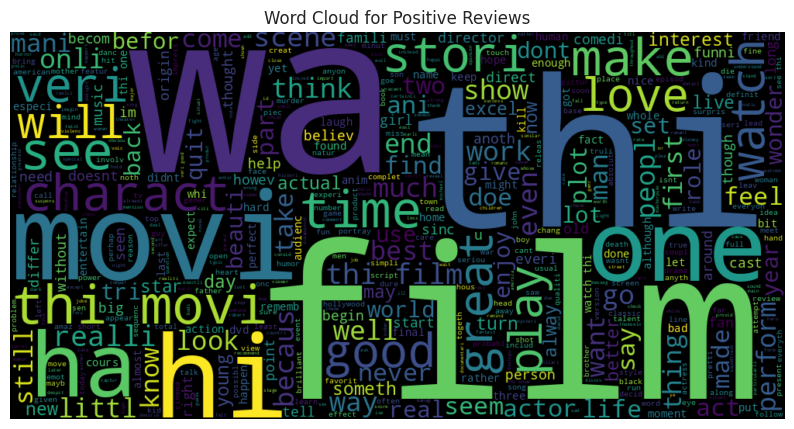

In [ ]:
# Reshape train_sentiments to a one-dimensional array
train_sentiments = train_sentiments.ravel()  # Convert to a one-dimensional array

# Ensure the shape after conversion
print("Shape of train_sentiments after reshaping:", train_sentiments.shape)

# Extract positive reviews from training data
positive_reviews = norm_train_reviews[train_sentiments == 1]  # Select positive reviews based on label

# Combine all positive reviews into a single string
positive_text = ' '.join(positive_reviews)

# Create a Word Cloud for positive words
plt.figure(figsize=(10, 10))
WC = WordCloud(width=1000, height=500, max_words=500, min_font_size=5).generate(positive_text)

# Display the Word Cloud
plt.imshow(WC, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Word Cloud for Positive Reviews')
plt.show()


#### **7.5.2. Word cloud for negative review**

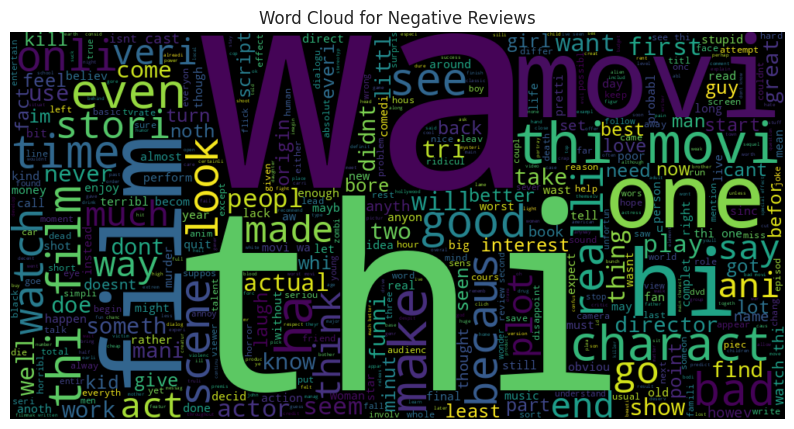

In [ ]:
# Extract negative reviews from training data
negative_reviews = norm_train_reviews[train_sentiments == 0]  # Select negative reviews based on label

# Combine all negative reviews into a single string
negative_text = ' '.join(negative_reviews)

# Create a Word Cloud for negative words
plt.figure(figsize=(10, 10))
WC = WordCloud(width=1000, height=500, max_words=500, min_font_size=5).generate(negative_text)

# Display the Word Cloud
plt.imshow(WC, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Word Cloud for Negative Reviews')
plt.show()


#**8. Sample text prediction for Sentiment Analysis using the trained model**

In [ ]:
# Sample text prediction for Sentiment Analysis using the trained model
def preprocess_input_text(text, vectorizer):
    """
    Preprocess the input text similar to the training data.
    Returns transformed vector ready for model prediction.
    """
    # Clean the text
    text = re.sub(r"<.*?>", "", text)  # remove HTML tags
    text = re.sub(r"[^a-zA-Z']", " ", text)  # keep only letters
    text = text.lower().strip()

    # Vectorize the input (like during training)
    return vectorizer.transform([text])

def predict_sentiment(text, model, vectorizer):
    """
    Predicts sentiment using the trained model and vectorizer.
    """
    processed = preprocess_input_text(text, vectorizer)
    prediction = model.predict(processed)[0]

    # For probability (if available)
    try:
        prob = model.predict_proba(processed)[0][1]
        return ("Positive 😊" if prediction == 1 else "Negative 😞", prob)
    except:
        return ("Positive 😊" if prediction == 1 else "Negative 😞", None)

In [ ]:
# Example usage
sample_text = "I was extremely disappointed. The plot made no sense and the acting was terrible."
sentiment, score = predict_sentiment(sample_text, lr, tv)

if score is not None:
    print(f"Sentiment: {sentiment} (Confidence: {score:.2f})")
else:
    print(f"Sentiment: {sentiment}")

Sentiment: Positive 😊 (Confidence: 0.51)


#**8.1. To perform batch sentiment predictions from a list of reviews**

In [ ]:
def predict_batch_sentiments(text_list, model, vectorizer):
    """
    Predicts sentiment for a list of reviews.
    Returns list of (original text, sentiment, probability).
    """
    cleaned = [re.sub(r"<.*?>", "", text.lower().strip()) for text in text_list]
    cleaned = [re.sub(r"[^a-zA-Z']", " ", text) for text in cleaned]
    transformed = vectorizer.transform(cleaned)

    predictions = model.predict(transformed)

    try:
        probs = model.predict_proba(transformed)[:, 1]  # Probability for class '1' (positive)
    except:
        probs = [None] * len(predictions)

    results = []
    for text, pred, prob in zip(text_list, predictions, probs):
        sentiment = "Positive 😊" if pred == 1 else "Negative 😞"
        results.append((text, sentiment, prob))
    return results

In [ ]:
#Example Usage
reviews = [
    "It was okay, nothing special but not bad either.",
    "Visuals were stunning, but the story was weak.",
    "I have no strong opinion about this film."
    "This movie was a total waste of time.",
    "I liked the concept, but the execution was poor.",
    "The performance by the lead actor was breathtaking!",
    "Meh, it was just fine. Nothing memorable.",
    "Brilliant direction and tight screenplay.",
    "Terribly written. I almost fell asleep.",
    "I’m not sure how I feel about this one.",
    "An emotional rollercoaster. I cried by the end!",
    "It had potential, but the plot was all over the place.",
    "Average at best. Not bad, not great either."
]

batch_results = predict_batch_sentiments(reviews, lr, cv)  # or lr, tv

for text, sentiment, prob in batch_results:
    print(f"\nReview: {text}\nSentiment: {sentiment}", end='')
    if prob is not None:
        print(f" (Confidence: {prob:.2f})")
    else:
        print()


Review: It was okay, nothing special but not bad either.
Sentiment: Positive 😊 (Confidence: 0.52)

Review: Visuals were stunning, but the story was weak.
Sentiment: Positive 😊 (Confidence: 0.51)

Review: I have no strong opinion about this film.This movie was a total waste of time.
Sentiment: Positive 😊 (Confidence: 0.51)

Review: I liked the concept, but the execution was poor.
Sentiment: Positive 😊 (Confidence: 0.51)

Review: The performance by the lead actor was breathtaking!
Sentiment: Positive 😊 (Confidence: 0.52)

Review: Meh, it was just fine. Nothing memorable.
Sentiment: Positive 😊 (Confidence: 0.51)

Review: Brilliant direction and tight screenplay.
Sentiment: Positive 😊 (Confidence: 0.51)

Review: Terribly written. I almost fell asleep.
Sentiment: Positive 😊 (Confidence: 0.50)

Review: I’m not sure how I feel about this one.
Sentiment: Positive 😊 (Confidence: 0.52)

Review: An emotional rollercoaster. I cried by the end!
Sentiment: Positive 😊 (Confidence: 0.51)

Review: It 